<a href="https://colab.research.google.com/github/Klrojasm/SyS/blob/main/punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

utilizando el cuaderno suministrado por el profesor, se saca el código necesario para así proceder a la creación de nuestra señal portadora y la mensajera:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Fc = 200000 #frecuencia de portadora

Fm = 48000 #frecuencia del mensaje
Am = 3 #amplitud del mensaje


ti = 0
tf = 10/Fm #cantidad de periodos a graficar de la

Fs = 10*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

3.0


Graficamos

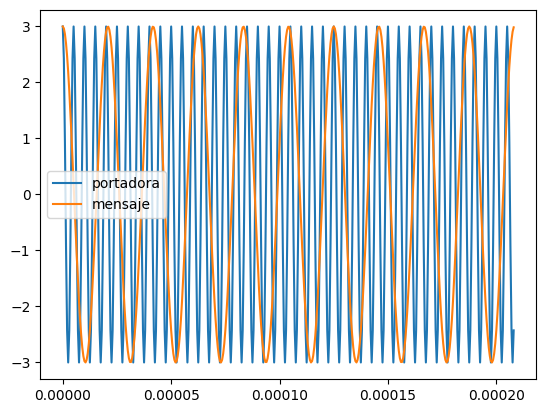

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

Se crea la señal ya modulada usando la ecuacion

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM

Obteniendo así la siguiente señal

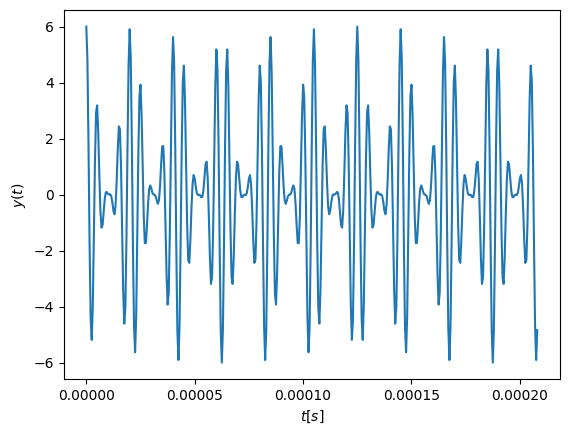

In [ ]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

cuyo espectro es

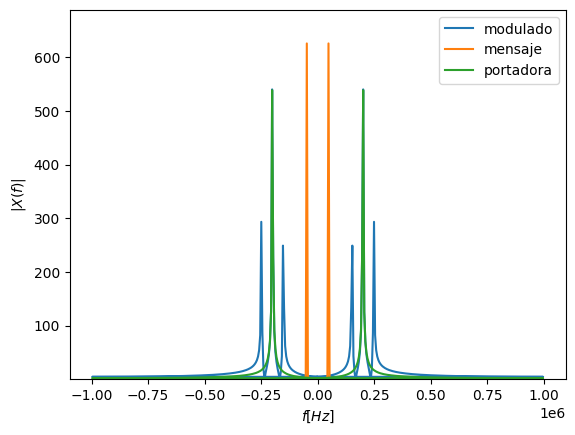

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Usamos el codigo trabajado para la descarga de canciones

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-a

escogemos nuestro link

In [ ]:
link="https://www.youtube.com/watch?v=-xNzx_9APdE"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}
!ffmpeg -y -i audio.mp3 output.wav
!pip install soundfile
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

[youtube] Extracting URL: https://www.youtube.com/watch?v=-xNzx_9APdE
[youtube] -xNzx_9APdE: Downloading webpage
[youtube] -xNzx_9APdE: Downloading ios player API JSON
[youtube] -xNzx_9APdE: Downloading android player API JSON
[youtube] -xNzx_9APdE: Downloading m3u8 information
[info] -xNzx_9APdE: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfon

y realizamos los  pasos anteriores

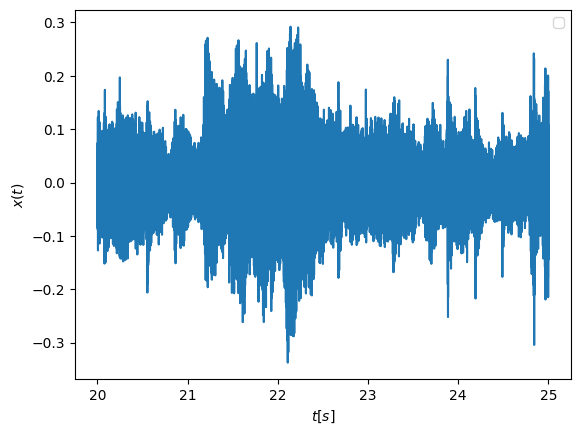

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)):,0]
tt = np.arange(ti,tf,1/fs) # vector de tiempo # Recorta xs para que tenga la misma longitud que tt
plt.plot(tt,xs)
plt.legend(('canal 1'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

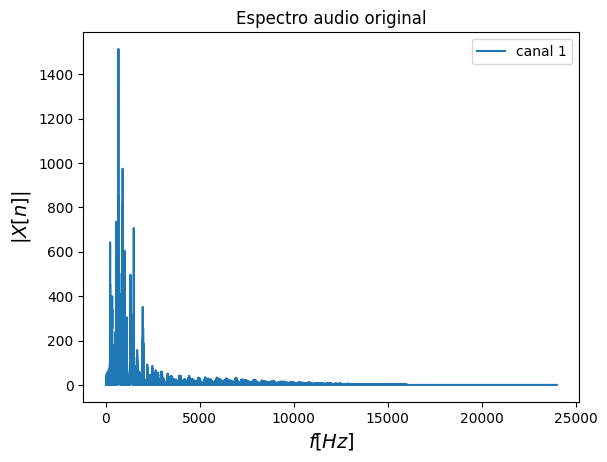

In [ ]:
Xwc1 = np.fft.rfft(xs)
#Xwc2 = np.fft.rfft(xs[:,1])
vf = np.fft.rfftfreq(np.size(xs,0),1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Xwc1))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

0.33709716796875


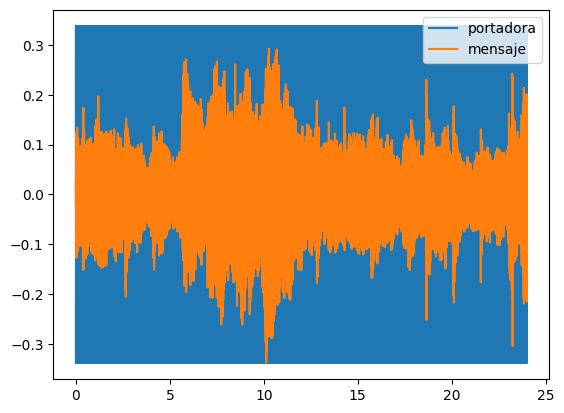

In [ ]:
Fc = 1000 #frecuencia de portadora
Fm = 100 #frecuencia del mensaje
Am = 3 #amplitud del mensaje
ti1 = 0
Fs = 10*Fc #frecuencia muestreo
m1 = xs
tf1 = len(m1) / Fs
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
t = np.arange(ti1, tf1, 1/Fs)
Ac = max(abs(m1))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)
plt.plot(t,c,label='portadora')
plt.plot(t,m1,label='mensaje')
plt.legend()
plt.show()

In [ ]:
y1 = (1+m1/Ac)*c #señal modulada en AM

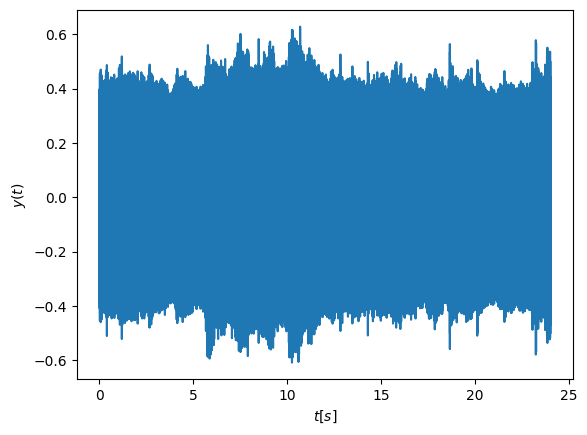

In [ ]:
plt.plot(t,y1)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

Para finalmente tener los siguientes 3 audios

In [ ]:
from IPython.display import Audio
fs1=200
Audio(c[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada


In [ ]:
xe1 = np.fft.irfft(m1,axis=0)
xe2 = np.fft.irfft(y1,axis=0)
Audio(y1[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada


In [ ]:
Audio(xs[:int(fs1*5000)].T,rate=fs)#repoducir señal filtrada

y su espectro

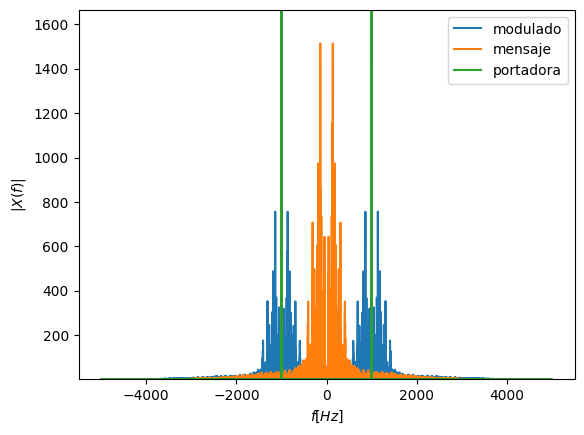

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m1)
Xfy = np.fft.fft(y1)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()